In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

# 아이리스 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

In [89]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()             # 표준화를 하기 위한 StandardScaler를 scaler변수에 넣는다
scaler.fit(X)                    # numerical data만 뽑았던 df_num dataset에 해당 scaler를 적용시킨다.
df_s = scaler.transform(X)       # StandardScaler가 적용된 df_num을 해당 scalar대로 변환한다.
df = pd.DataFrame(df_s)

In [109]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans

# KMeans객체 생성(클러스터 수 3)
km = KMeans(n_clusters=5, random_state=42)

# 학습하기
km.fit(df)

KMeans(n_clusters=5, random_state=42)

In [110]:
km.labels_

array([1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 4, 0, 4, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 4, 0, 4, 0, 4, 4, 3, 4, 0, 4,
       4, 0, 4, 0, 0, 4, 0, 4, 4, 3, 4, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4, 4,
       0, 0, 0, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0])

In [111]:
# 0, 1, 2에 해당되는 샘플의 개수 확인
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([48, 25, 25, 23, 29], dtype=int64))

In [112]:
km.transform(df[100:101])

array([[1.63950653, 4.21432505, 4.3898041 , 2.94288155, 1.03728192]])

In [113]:
km.predict(df[100:101])

array([4])

In [114]:
km.n_iter_

5

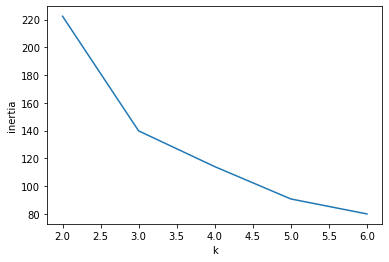

In [115]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

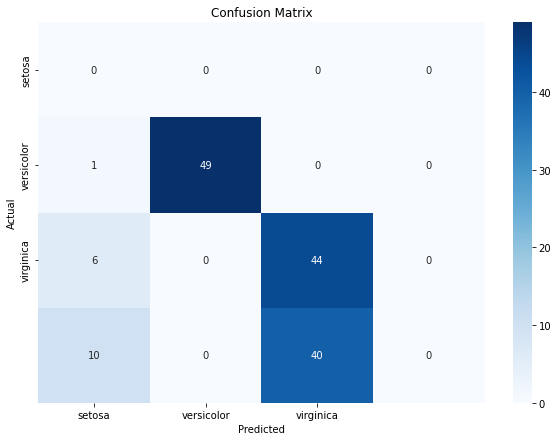

In [116]:
# 혼동 행렬 생성
conf_matrix = confusion_matrix(y, labels)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [117]:
# 정확도 계산
accuracy = accuracy_score(y, labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 62.00%


## 클러스터링 결과를 활용하여 분류 모델 만들어보기

In [119]:
mask = labels != -1
X_filtered = df_s[mask]
y_filtered = y[mask]
labels_filtered = labels[mask]

In [122]:
unique_labels = np.unique(labels_filtered)
new_class_labels = np.zeros_like(labels_filtered)

for i, label in enumerate(unique_labels):
    new_class_labels[labels_filtered == label] = i

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_filtered, new_class_labels, test_size=0.3, random_state=42)

## 랜덤 포레스트(Random Forest)

In [124]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1)

np.mean(scores['train_score']), np.mean(scores['test_score'])

(1.0, 1.0)

In [125]:
# 랜덤 포레스트 모델을 훈련세트로 훈련한 후 특성 중요도 확인
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.18053449, 0.00317104, 0.40085868, 0.41543579])

In [126]:
# 새로운 랜덤포레스트 객체를 이용하여 oob_score 확인
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(X_train, y_train)
rf.oob_score_

1.0

## 엑스트라 트리(Extra Trees)

In [128]:
# ExtraTreesClassifier를 적용하여 교차 검증 점수 확인
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True, n_jobs=-1)

np.mean(scores['train_score']), np.mean(scores['test_score'])

(1.0, 1.0)

In [132]:
# 특성 중요도 확인
et.fit(X_train, y_train)
et.feature_importances_

array([0.13286094, 0.05966824, 0.46254039, 0.34493043])

## 그레이디언트 부스팅(Gradient boosting)

In [135]:
# GradientBoostingClassifier 사용
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)

np.mean(scores['train_score']), np.mean(scores['test_score'])

(1.0, 1.0)

In [136]:
# 트리 개수와 학습률을 조정하여 학습
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)

np.mean(scores['train_score']), np.mean(scores['test_score'])

(1.0, 1.0)

In [137]:
# 특성 중요도 확인
gb.fit(X_train, y_train)
gb.feature_importances_

array([-5.68987396e-18,  3.88808054e-17,  9.16738786e-01,  8.32612139e-02])

In [138]:
# 사이킷런 1.0 버전 아래에서는 다음 라인의 주석을 해제하고 실행
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True, n_jobs=-1)

np.mean(scores['train_score']), np.mean(scores['test_score'])

(1.0, 1.0)

In [139]:
# 훈련 세트의 특성 중요도
from sklearn.inspection import permutation_importance

hgb.fit(X_train, y_train)
result = permutation_importance(hgb, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=-1)
result.importances_mean

array([0.       , 0.       , 0.4344086, 0.       ])

In [140]:
# 테스트 세트의 특성 중요도
result = permutation_importance(hgb, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
result.importances_mean

array([0.  , 0.  , 0.48, 0.  ])

In [141]:
# 테스트 세트로 최종 성능 확인
hgb.score(X_test, y_test)

1.0